# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 2.4.11 


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240L, 320L, 3L)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape

(240L, 320L)

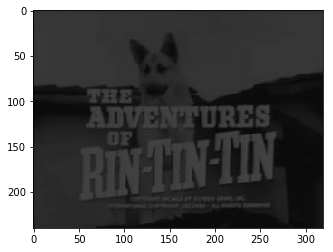

In [6]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

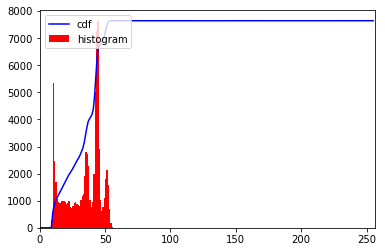

In [7]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

In [22]:
x0 = np.amin(rintin)
y0 = 0
x1 = np.amax(rintin)
y1 = 255
m = (y1 - y0)/(x1 - x0)
rintin

array([[[ 65,  65,  65],
        [155, 155, 155],
        [170, 170, 170],
        ..., 
        [165, 165, 165],
        [165, 165, 165],
        [145, 145, 145]],

       [[ 70,  70,  70],
        [160, 160, 160],
        [180, 180, 180],
        ..., 
        [170, 170, 170],
        [170, 170, 170],
        [145, 145, 145]],

       [[ 75,  75,  75],
        [165, 165, 165],
        [185, 185, 185],
        ..., 
        [170, 170, 170],
        [175, 175, 175],
        [150, 150, 150]],

       ..., 
       [[ 30,  30,  30],
        [100, 100, 100],
        [135, 135, 135],
        ..., 
        [ 50,  50,  50],
        [ 50,  50,  50],
        [ 45,  45,  45]],

       [[ 40,  40,  40],
        [105, 105, 105],
        [140, 140, 140],
        ..., 
        [ 50,  50,  50],
        [ 45,  45,  45],
        [ 45,  45,  45]],

       [[ 50,  50,  50],
        [115, 115, 115],
        [150, 150, 150],
        ..., 
        [ 50,  50,  50],
        [ 45,  45,  45],
        [ 45,  45,

In [9]:
nova_imagem = rintin

In [10]:
for i in range (len(nova_imagem)):
    for y in range (len(nova_imagem[i])):
        for z in range (len(nova_imagem[i][y])):
            nova_imagem[i][y][z] = m*(nova_imagem[i][y][z] - x0)

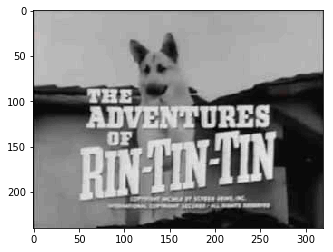

In [11]:
plt.imshow(nova_imagem)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [12]:
imagem = cv2.imread("hall_box_battery1.jpg")

In [13]:
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

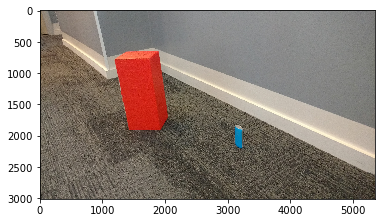

In [14]:
plt.imshow(imagem_rgb)

In [15]:
imagem_r = imagem_rgb[:,:,0]
imagem_r

array([[152, 155, 154, ..., 114, 113, 113],
       [153, 155, 154, ..., 118, 117, 122],
       [155, 156, 154, ..., 118, 117, 122],
       ..., 
       [ 79,  79,  89, ...,  30,  41,  47],
       [ 82,  83,  89, ...,  38,  44,  46],
       [ 91,  87,  85, ...,  47,  49,  46]], dtype=uint8)

In [16]:
new = imagem_rgb

In [17]:
for i in range (len(new)):
    for y in range (len(new[i])):
        if new[i][y][0] > 150:
            if new[i][y][1] < 140:
                if new[i][y][2] < 140:
                    new[i][y] = 255

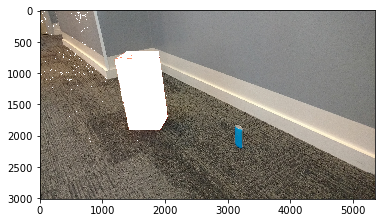

In [18]:
plt.imshow(new)